### Simulate data for null t-test

Run a simulation for a t-test that is randomly sampled from one distribution with no effect between groups, and identify experiments with a significant effect.

In [2]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
# Parameters for the simulation
nsamples = 8 # number of samples per group
mu = 900
sigma = 150
niter = 1000

experiments = {
    'vals': list(),
    'tstat': list(),
    'pval': list()
}

In [22]:
for n in range(niter):
    # Simulate data from a gaussian distribution
    vals = np.random.normal(loc=mu, scale=sigma, size=(nsamples,2))

    # Calculate the t-statistic and p-value
    res = sp.stats.ttest_ind(vals[:,0], vals[:,1])
    tstat = res.statistic
    pval = res.pvalue

    experiments['vals'].append(vals)
    experiments['tstat'].append(tstat)
    experiments['pval'].append(pval)

In [23]:
# Put the experiment results in a DataFrame
all_res = pd.DataFrame({
    'tstat': experiments['tstat'],
    'pval': experiments['pval']
})

all_res.describe()

,tstat,pval
count,1000.000000,1000.000000
mean,-0.069065,0.514440
std,1.047776,0.289680
min,-4.643200,0.000380
25%,-0.713966,0.271697
50%,-0.002513,0.521576
75%,0.593154,0.761093
max,3.934629,0.999538


In [24]:
all_res[all_res['pval']<0.05]

,tstat,pval
0,3.934629,0.001496
3,-2.318947,0.036031
43,-2.385277,0.031751
55,-2.923365,0.011117
86,2.805277,0.014034
117,-2.566646,0.022383
136,2.275800,0.039102
141,2.653691,0.018892
142,-2.373434,0.032478
155,-4.643200,0.000380


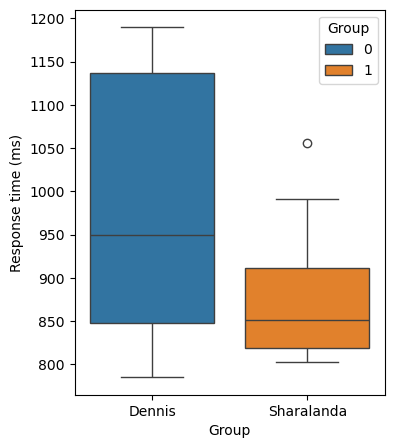

In [37]:
# Get the data for an example experiment
exp_sample = pd.DataFrame({
    'Response time (ms)': experiments['vals'][696].flatten(),
    'Group': np.repeat([0, 1], nsamples)
})

fig, ax = plt.subplots(figsize=(4,5))
sns.boxplot(ax=ax,data=exp_sample,x='Group',y='Response time (ms)',hue='Group')
plt.xticks([0, 1], ['Dennis','Sharalanda'])
plt.show()